In [10]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
import time 

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


In [ ]:
class MyFeatureSelector():
    def __init__(self, features=5, method='pca'):
        self.features = features
        self.method = method
        self.selector = None
        self.init_selector()


    def init_selector():
        if self.method == 'pca':
            self.selector = PCA(n_components=self.features)
        elif self.method == 'rfe':
        self.selector = RFE(estimator=LinearRegression(n_jobs=-1),
                               n_features_to_select=self.features,
                               step=1)

    def fit(self, X, Y):
       return self

    def transform(self, X, Y=None):
        try:
            if self.features < X.shape[1]:
                if Y is not None:
                    self.selector.fit(X, Y)
                return selector.transform(X)
        except Exception as err:
            print('MyFeatureSelector.transform(): {}'.format(err))
       return X

def fit_transform(self, X, Y=None):
    self.fit(X, Y)
    return self.transform(X, Y)

In [39]:
startT = time.time()

data = load_wine()
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [43]:

y = data.target
winedf=pd.DataFrame(data.data, columns=data.feature_names)
winedf['quality']=y
# winedf = pd.read_csv('winequality-red.csv',sep=';')
print(data.target_names)
print (winedf.sample(3))


['class_0' 'class_1' 'class_2']
     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
174    13.40        3.91  2.48               23.0      102.0           1.80   
94     11.62        1.99  2.28               18.0       98.0           3.02   
143    13.62        4.95  2.35               20.0       92.0           2.00   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
174        0.75                  0.43             1.41             7.30  0.70   
94         2.26                  0.17             1.35             3.25  1.16   
143        0.80                  0.47             1.02             4.40  0.91   

     od280/od315_of_diluted_wines  proline  quality  
174                          1.56    750.0        2  
94                           2.96    345.0        1  
143                          2.05    550.0        2  


(178, 1)
1    71
0    59
2    48
Name: quality, dtype: int64


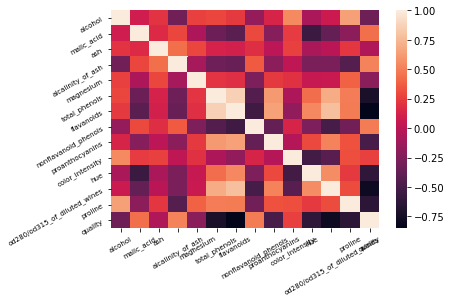

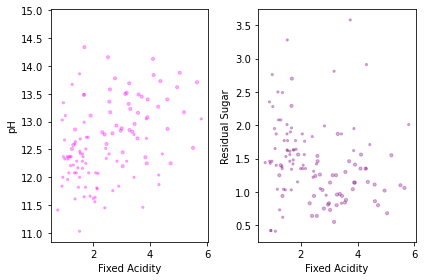

In [49]:
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+ check whether the labels are unblanced or not
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++

winedf.shape
ylab = winedf[['quality']]
print (ylab.shape)
print (winedf['quality'].value_counts()) # indeed it is

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# check the correlation plot

winecorr = winedf.corr()
s=sns.heatmap(winecorr)
s.set_yticklabels(s.get_yticklabels(),rotation=30,fontsize=7)
s.set_xticklabels(s.get_xticklabels(),rotation=30,fontsize=7)

plt.show() # as expected high correlation between acidity and pH

# individual correlation plot
plt.subplot(1,2,1)
plt.scatter(winedf['malic_acid'], winedf['alcohol'], s=winedf['quality']*5, color='magenta', alpha=0.3)
plt.xlabel('Fixed Acidity')
plt.ylabel('pH')
plt.subplot(1,2,2)
plt.scatter(winedf['malic_acid'], winedf['proanthocyanins'], s=winedf['quality']*5, color='purple', alpha=0.3)
plt.xlabel('Fixed Acidity')
plt.ylabel('Residual Sugar')
plt.tight_layout()
plt.show()

In [47]:

X=winedf.drop(['quality'],axis=1)
Y=winedf['quality']

print (type(X), type(Y))
print (X.head(3))

#++++++++++++++++++++++++++++++++
# create the pipeline object
#++++++++++++++++++++++++++++++++
steps = [('scaler', StandardScaler()), ('SVM', SVC())]
pipeline = Pipeline(steps)


#++++++++++++++++++++++++++++++++++++++
#+ create the hyperparameter space
#++++++++++++++++++++++++++++++++++++++

parameteres = {'SVM__C':[0.001,0.1,10,100,10e5], 'SVM__gamma':[0.1,0.01]}

#++++++++++++++++++++++++++++++++++++
#+ create train and test sets
#++++++++++++++++++++++++++++++++++++

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=30, stratify=Y)

#print X_test.shape

#++++++++++++++++++++++++++++++
#+ Grid Search Cross Validation
#++++++++++++++++++++++++++++++
grid = GridSearchCV(pipeline, param_grid=parameteres, cv=5)

grid.fit(X_train, y_train)

print ("score = %3.2f" %(grid.score(X_test,y_test)))

#pparam=pprint.PrettyPrinter(indent=2)

print (grid.best_params_)
endT = time.time()

print ("total time elapsed = %3.3f"%(endT-startT))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
score = 1.00
{'SVM__C': 10, 'SVM__gamma': 0.1}
total time elapsed = 898.648
